# WhatsApp Chat NLP Project

Flirt Prediction & Sentiment Analysis & Topic modelling & word cloud

## 1. Problem Statement
Build an NLP-based system to analyze WhatsApp chats.

## 2. Import Libraries

In [1]:
import sys
print(sys.executable)

C:\Users\huawei\anaconda3\envs\nlp\python.exe


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.pipeline import make_pipeline
from datetime import datetime


## 3. Load Dataset

In [3]:
df = pd.read_csv("whatsapp_flirt_dataset_manual.csv",on_bad_lines='skip',encoding='utf8')
df.shape

(1000, 5)

## 4. Data Preprocessing

In [4]:
df['Flirt_Label'].value_counts()

Flirt_Label
0    513
1    487
Name: count, dtype: int64

In [ ]:
df.columns

## 5. Flirt Prediction Model (TF-IDF + classification algorirthm)

In [5]:
X = df['chat']
y = df['Flirt_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Creating pipeline
def create_pipeline(model):  
        return make_pipeline(
                        TfidfVectorizer(stop_words='english'),
                        model
                )

# =========================
#  Initialize models
# =========================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": LinearSVC(max_iter=1000),
    "PAC":PassiveAggressiveClassifier(max_iter=1000),
    "MultinomialNB":MultinomialNB(),
    "SGD Classifier": SGDClassifier(max_iter=1000, tol=1e-3)#tol=0.001 model stops if loss dont improve and it stops even before max iter reaches
}

# =========================
#  Train and evaluate
# =========================
for name, model in models.items():
    pipeline = create_pipeline(model)
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n=== {name} ===")
    print("Accuracy:", round(accuracy, 4))
    print("Confusion Matrix:\n", cm)


C:\Users\huawei\anaconda3\envs\nlp\Lib\site-packages\sklearn\utils\deprecation.py:71: FutureWarning: Class PassiveAggressiveClassifier is deprecated; this is deprecated in version 1.8 and will be removed in 1.10. Use `SGDClassifier(loss='hinge', penalty=None, learning_rate='pa1', eta0=1.0)` instead.
  warnings.warn(msg, category=FutureWarning)



=== Logistic Regression ===
Accuracy: 0.9967
Confusion Matrix:
 [[158   0]
 [  1 141]]

=== Linear SVC ===
Accuracy: 0.9967
Confusion Matrix:
 [[158   0]
 [  1 141]]

=== PAC ===
Accuracy: 0.9967
Confusion Matrix:
 [[158   0]
 [  1 141]]

=== MultinomialNB ===
Accuracy: 0.9967
Confusion Matrix:
 [[158   0]
 [  1 141]]

=== SGD Classifier ===
Accuracy: 0.9933
Confusion Matrix:
 [[158   0]
 [  2 140]]


## 6. save the best model and making predictions

In [6]:

# =========================
print("\nUsing the BEST model for prediction")

best_pipeline = create_pipeline(
     LogisticRegression(max_iter=1000)
)

# Train best model
best_pipeline.fit(X_train, y_train)



Using the BEST model for prediction


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidfvectorizer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [7]:
#making predictions using the pipeline
chat="Keep shining, you're breathtaking"
result=best_pipeline.predict([chat])[0]
print(result)
if result==0:
    print("The message is not flirty")
else:
    print("The message is flirty")


1
The message is flirty


## 7. Chat Analytics

# More Talkative user and less talkative user

In [8]:
print(df['name'].value_counts())

name
You      281
Ali      255
Crush    236
Sara     228
Name: count, dtype: int64


In [9]:
Talker=df['name'].value_counts().idxmax()
print("More Talktative:", Talker.upper())
Less_Talker=df['name'].value_counts().idxmin()
print("Less Talktative:", Less_Talker.upper())


More Talktative: YOU
Less Talktative: SARA


C:\Users\huawei\AppData\Local\Temp\ipykernel_32592\3758468015.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")


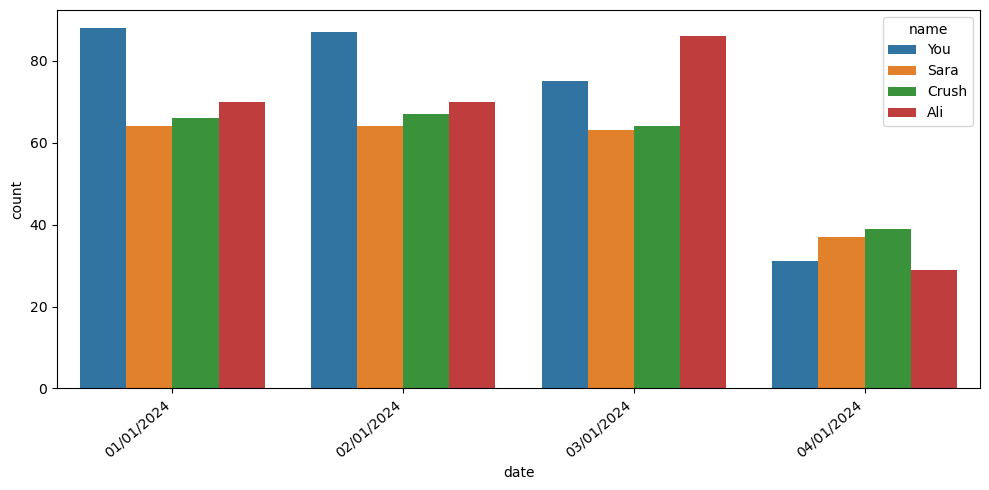

In [10]:
plt.figure(figsize=(10,5))
ax1=sns.countplot(x='date',hue='name', data=df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Most Active date

In [11]:

date_counts = df["date"].value_counts()
most_active_dates = date_counts[date_counts == date_counts.max()].index.tolist()
print("Mostactive dates",most_active_dates)

Mostactive dates ['01/01/2024', '02/01/2024', '03/01/2024']


# Active Time and Average message per Day

In [12]:
active_time=df["time"].value_counts().idxmax()
print("Active hour of the day",active_time)
avg_no_of_msgs_per_day = round(df["date"].count() / df["date"].nunique())
print("Average message per day:",avg_no_of_msgs_per_day )

Active hour of the day 12:00 am
Average message per day: 250


# Active day of the week

In [15]:
week_days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
if(len(most_active_dates)>1):
        for itr in most_active_dates:            
                        l=list(map(int, itr.split('/')))
                        day=datetime(l[2],l[0],l[1]).weekday() #return integer for the day.
                        active_week_day=week_days[day]
                        print("Active day of the week:",active_week_day)

else:
        l=list(map(int, most_active_dates.split('/')))
        day=datetime.date(l[2],l[0],l[1]).weekday() #return integer for the day.
        active_week_day=week_days[day]
        print("Active day of the week:",active_week_day)


Active day of the week: Monday
Active day of the week: Thursday
Active day of the week: Friday


# Media count per user

In [36]:

media_Count=df[df['chat'].str.contains('omitted', case=False)]['name'].value_counts()
print(media_Count)

name
You      5
Ali      2
Crush    2
Sara     1
Name: count, dtype: int64


# Message deleted User

In [35]:

message_deleted=df[df['chat'].str.contains('deleted', case=False)]['name'].value_counts()
print(message_deleted)

name
You      4
Crush    3
Ali      1
Sara     1
Name: count, dtype: int64


# Missed audio calls

In [17]:

df[df['chat'].str.contains('missed voice call', case=False)]['name'].value_counts()

name
Sara     5
Ali      2
Crush    1
You      1
Name: count, dtype: int64

# Missed video calls

In [18]:
df[df['chat'].str.contains('missed video call', case=False)]['name'].value_counts()

name
Crush    4
You      4
Sara     2
Ali      1
Name: count, dtype: int64

# Sentiment Analaysis

In [20]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
df.dropna(inplace=True)
df['scores']=df['chat'].apply(lambda x:sia.polarity_scores(x))
df['compound']=df['scores'].apply(lambda x:x['compound'])
df['positive']=df['scores'].apply(lambda x:x['pos'])
df['negative']=df['scores'].apply(lambda x:x['neg'])
df['neutral']=df['scores'].apply(lambda x:x['neu'])
df['comp_score']=df['compound'].apply(lambda x: 'pos' if x>0 else 'neg')
print(df.head())                 



         date      time  name                                   chat  \
0  01/01/2024  12:00 am   You             Team building event Friday   
1  01/01/2024  12:05 am  Sara            Store closing in 15 minutes   
2  01/01/2024  12:10 am   You  You're the plot twist I didn't expect   
3  01/01/2024  12:15 am  Sara             Lowkey have a crush on you   
4  01/01/2024  12:20 am  Sara           You + me = perfect chemistry   

   Flirt_Label                                             scores  compound  \
0            0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
1            0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
2            1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
3            1  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...   -0.1531   
4            1  {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...    0.5719   

   positive  negative  neutral comp_score  
0     0.000     0.000    1.000        neg  
1   

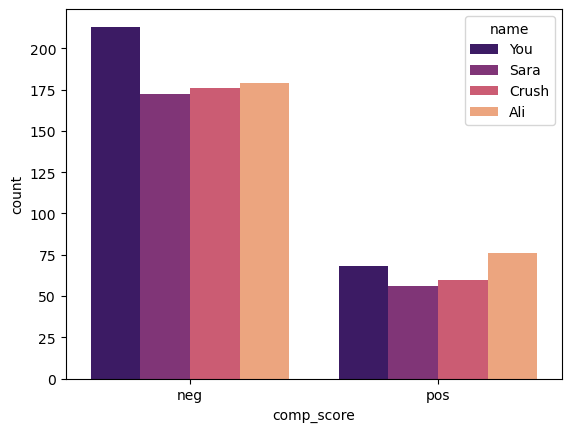

In [21]:
#Plotting Sentiment graph
comp=sns.countplot(x=df['comp_score'],hue='name',data=df,palette='magma')
#comp.figure.savefig("date_charts.png")


In [22]:
#printing count of postive and negative messages
print(df['comp_score'].value_counts())

comp_score
neg    740
pos    260
Name: count, dtype: int64


# Topic Modelling

In [23]:
from sklearn.decomposition import NMF
tfv=TfidfVectorizer(stop_words='english')
weighted_mat=tfv.fit_transform(df['chat'])

In [24]:
print(weighted_mat)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3016 stored elements and shape (1000, 336)>
  Coords	Values
  (0, 287)	0.4360124282929518
  (0, 26)	0.5396491510639996
  (0, 91)	0.5396491510639996
  (0, 116)	0.47691796976617745
  (1, 276)	0.5264455451287039
  (1, 47)	0.5264455451287039
  (1, 2)	0.5264455451287039
  (1, 190)	0.4105670031096329
  (2, 224)	0.5
  (2, 307)	0.5
  (2, 74)	0.5
  (2, 95)	0.5
  (3, 175)	0.7071067811865475
  (3, 56)	0.7071067811865475
  (4, 214)	0.683209016453796
  (4, 42)	0.7302228699761717
  (5, 17)	0.5097382730301161
  (5, 273)	0.5658040495878894
  (5, 12)	0.5282997213181131
  (5, 296)	0.37540920997416166
  (6, 190)	0.39541564717664734
  (6, 302)	0.5486020390332581
  (6, 69)	0.4916483209622264
  (6, 3)	0.5486020390332581
  (7, 117)	0.5707346397208277
  :	:
  (993, 191)	0.6774576856109087
  (993, 100)	0.7355617473786352
  (994, 313)	0.5285071415364054
  (994, 154)	0.5787996806841502
  (994, 10)	0.6210242595784353
  (995, 287)	0.4360124282929518
  (

In [25]:
nmf=NMF(n_components=5,random_state=42)
nmf.fit(weighted_mat)


,"n_components n_components: int or {'auto'} or None, default='auto'Number of components. If `None`, all features are kept.If `n_components='auto'`, the number of components is automatically inferredfrom W or H shapes... versionchanged:: 1.4 Added `'auto'` value... versionchanged:: 1.6 Default value changed from `None` to `'auto'`.",5
,"init init: {'random', 'nndsvd', 'nndsvda', 'nndsvdar', 'custom'}, default=NoneMethod used to initialize the procedure.Valid options:- `None`: 'nndsvda' if n_components <= min(n_samples, n_features), otherwise random.- `'random'`: non-negative random matrices, scaled with: `sqrt(X.mean() / n_components)`- `'nndsvd'`: Nonnegative Double Singular Value Decomposition (NNDSVD) initialization (better for sparseness)- `'nndsvda'`: NNDSVD with zeros filled with the average of X (better when sparsity is not desired)- `'nndsvdar'` NNDSVD with zeros filled with small random values (generally faster, less accurate alternative to NNDSVDa for when sparsity is not desired)- `'custom'`: Use custom matrices `W` and `H` which must both be provided... versionchanged:: 1.1 When `init=None` and n_components is less than n_samples and n_features defaults to `nndsvda` instead of `nndsvd`.",None
,"solver solver: {'cd', 'mu'}, default='cd'Numerical solver to use:- 'cd' is a Coordinate Descent solver.- 'mu' is a Multiplicative Update solver... versionadded:: 0.17 Coordinate Descent solver... versionadded:: 0.19 Multiplicative Update solver.",'cd'
,"beta_loss beta_loss: float or {'frobenius', 'kullback-leibler', 'itakura-saito'}, default='frobenius'Beta divergence to be minimized, measuring the distance between Xand the dot product WH. Note that values different from 'frobenius'(or 2) and 'kullback-leibler' (or 1) lead to significantly slowerfits. Note that for beta_loss <= 0 (or 'itakura-saito'), the inputmatrix X cannot contain zeros. Used only in 'mu' solver... versionadded:: 0.19",'frobenius'
,"tol tol: float, default=1e-4Tolerance of the stopping condition.",0.0001
,"max_iter max_iter: int, default=200Maximum number of iterations before timing out.",200
,"random_state random_state: int, RandomState instance or None, default=NoneUsed for initialisation (when ``init`` == 'nndsvdar' or'random'), and in Coordinate Descent. Pass an int for reproducibleresults across multiple function calls.See :term:`Glossary `.",42
,"alpha_W alpha_W: float, default=0.0Constant that multiplies the regularization terms of `W`. Set it to zero(default) to have no regularization on `W`... versionadded:: 1.0",0.0
,"alpha_H alpha_H: float or ""same"", default=""same""Constant that multiplies the regularization terms of `H`. Set it to zero tohave no regularization on `H`. If ""same"" (default), it takes the same value as`alpha_W`... versionadded:: 1.0",'same'
,"l1_ratio l1_ratio: float, default=0.0The regularization mixing parameter, with 0 <= l1_ratio <= 1.For l1_ratio = 0 the penalty is an elementwise L2 penalty(aka Frobenius Norm).For l1_ratio = 1 it is an elementwise L1 penalty.For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2... versionadded:: 0.17 Regularization parameter *l1_ratio* used in the Coordinate Descent solver.",0.0
,"verbose verbose: int, default=0Whether to be verbose.",0


In [24]:
print(nmf.components_)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.94330330e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.73489091e-01 0.00000000e+00 ... 1.64560923e-03
  0.00000000e+00 0.00000000e+00]
 [6.46659251e-01 2.55426962e-02 2.57428965e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.45280281e-02
  2.52734498e-40 2.87986553e-29]]


In [26]:
for index,weight in enumerate(nmf.components_):
    print([tfv.get_feature_names_out()[i] for i in weight.argsort()[-5:]])
    

['let', 'feels', 'make', 'doing', 'tonight']
['making', 'stop', 'good', 'trouble', 'like']
['going', 'traffic', 'terrible', 'lunch', 'today']
['10', 'meeting', 'project', 'group', 'minutes']
['addictive', 'kinda', 'video', 'voice', 'missed']


In [27]:
topics=nmf.transform(weighted_mat) #convert weight into porbability 
df['Topic']=topics.argmax(axis=1)

In [27]:
df.head()

,date,time,name,chat,Flirt_Label,scores,compound,positive,negative,neutral,comp_score,Topic
0,01/01/2024,12:00 am,You,Team building event Friday,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neg,2
1,01/01/2024,12:05 am,Sara,Store closing in 15 minutes,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neg,3
2,01/01/2024,12:10 am,You,You're the plot twist I didn't expect,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neg,4
3,01/01/2024,12:15 am,Sara,Lowkey have a crush on you,1,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.1531,0.000,0.286,0.714,neg,4
4,01/01/2024,12:20 am,Sara,You + me = perfect chemistry,1,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.5719,0.552,0.000,0.448,pos,3


In [28]:
# print count for each topics
df['Topic'].value_counts()

Topic
3    272
0    240
4    232
1    133
2    123
Name: count, dtype: int64

# WordCloud

In [ ]:
#!pip install wordcloud 

In [29]:
import wordcloud
print(wordcloud.__version__)

1.9.4


In [3]:
import nltk
print(nltk.__version__)
nltk.download('stopwords')

3.9.2


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

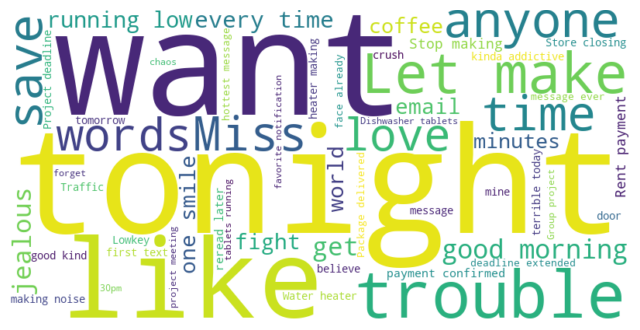

In [32]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Prepare stopwords
stoplist = stopwords.words('english')
stoplist.extend([
    'omitted', 'voice', 'missed', 'call', 'video', 'deleted', 'media'
])

# Combine all chat text
text = " ".join(df['chat'].astype(str))

# Generate WordCloud
wordcl = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords=stoplist,
    min_font_size=10
).generate(text)

# Display
plt.figure(figsize=(8,6))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis("off")
plt.show()
